In [425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [426]:
path_gc = r'/content/drive/MyDrive/Colab Notebooks/ESTAGIO LGHM/GCNetwork.txt'
path_gnomad = r"/content/drive/MyDrive/Colab Notebooks/ESTAGIO LGHM/gnomad.v2.1.1.all_lofs.txt.bgz"

In [427]:
gnomad = pd.read_csv(path_gnomad, compression='gzip', on_bad_lines='skip', delim_whitespace=True, low_memory=False)
gc = pd.read_csv(path_gc, skiprows = [i for i in range (1,75)], delim_whitespace=True)
gnomad.rename(columns = {'pos':'Variant'}, inplace = True)

- CFTR
- Uma variante pode afetar mais de um transcritos, registrar quantos são afetados por cada consequencia
- registrar quantas variantes por cada consequencia

In [428]:
gnomad

,chrom,Variant,ref,alt,most_severe_consequence,gene_ids,gene_symbols,transcript_ids
0,1,69456,C,CCTACA,frameshift_variant,ENSG00000186092,OR4F5,ENST00000335137
1,1,69469,ACAATT,A,frameshift_variant,ENSG00000186092,OR4F5,ENST00000335137
2,1,69516,G,A,stop_gained,ENSG00000186092,OR4F5,ENST00000335137
3,1,69620,TA,T,frameshift_variant,ENSG00000186092,OR4F5,ENST00000335137
4,1,69702,TG,T,frameshift_variant,ENSG00000186092,OR4F5,ENST00000335137
...,...,...,...,...,...,...,...,...
443764,Y,22921918,C,G,stop_gained,ENSG00000157828,RPS4Y2,ENST00000288666
443765,Y,22930689,A,G,splice_acceptor_variant,ENSG00000157828,RPS4Y2,ENST00000288666
443766,Y,22930763,C,T,stop_gained,ENSG00000157828,RPS4Y2,ENST00000288666
443767,Y,25375763,CA,C,frameshift_variant,ENSG00000205944,DAZ2,"ENST00000382440,ENST00000382433,ENST0000038229..."


In [429]:
##variantes e transcritos sem distinção de consequencia.
#substituindo as consequencias por numeros
all = gnomad[(gnomad['gene_symbols'] == 'CFTR')].drop(['chrom', 'ref', 'alt', 'gene_ids',  'gene_symbols'], axis=1)
all = all.replace(['frameshift_variant','stop_gained','splice_donor_variant','splice_acceptor_variant'],['1','2','3','4']).values.T

In [430]:
for i in range(145):
  all[2][i] = all[2][i].split(',') #split dos transcritos que estavam juntos em uma única string

variant_id = [str(variant) for variant in all[0]] #tornando as variantes uma string para adicionar como key no dicionario

In [431]:
conseq_transc = [] #lista para juntar consequencias e transcritos
for i in range(144):
  for j in range(len(all[2][i])): #range de acordo com a quantidade de transcritos no vetor
    lista = (all[1][i],all[2][i][j])
    conseq_transc.append(lista)

print(conseq_transc)
print(len(conseq_transc))

[('2', 'ENST00000003084'), ('2', 'ENST00000426809'), ('2', 'ENST00000454343'), ('1', 'ENST00000003084'), ('1', 'ENST00000426809'), ('1', 'ENST00000454343'), ('3', 'ENST00000003084'), ('3', 'ENST00000426809'), ('3', 'ENST00000454343'), ('2', 'ENST00000003084'), ('2', 'ENST00000426809'), ('2', 'ENST00000454343'), ('1', 'ENST00000003084'), ('1', 'ENST00000426809'), ('1', 'ENST00000454343'), ('2', 'ENST00000003084'), ('2', 'ENST00000426809'), ('2', 'ENST00000454343'), ('2', 'ENST00000003084'), ('2', 'ENST00000426809'), ('2', 'ENST00000454343'), ('1', 'ENST00000003084'), ('1', 'ENST00000426809'), ('1', 'ENST00000454343'), ('1', 'ENST00000003084'), ('1', 'ENST00000426809'), ('1', 'ENST00000454343'), ('1', 'ENST00000003084'), ('1', 'ENST00000426809'), ('1', 'ENST00000446805'), ('1', 'ENST00000454343'), ('3', 'ENST00000003084'), ('3', 'ENST00000426809'), ('3', 'ENST00000446805'), ('3', 'ENST00000454343'), ('4', 'ENST00000003084'), ('4', 'ENST00000426809'), ('4', 'ENST00000446805'), ('4', 'ENST

In [ ]:
var_cons_transc = [] #lista para armazenar os dicionarios
#precisa ser uma lista porque as variantes irão se repetir para diferentes transcritos
#dicionários não aceitam valores repetidos
for i in range(144):
  for j in range(len(all[2][i])):
    dicts = {variant_id[i]:conseq_transc[j]} #key: variantes, value: (conseq, transcritos)
    var_cons_transc.append(dicts)

var_cons_transc

In [433]:
#140 variantes unicas para o gene CFTR
unique_variantes = gnomad.loc[(gnomad['gene_symbols']=='CFTR'),'Variant'].unique()
len_variantes = len(unique_variantes)

In [435]:
a = [np.array(i) for i in all[2]]
transc = np.concatenate((a))
unique_transc = np.unique(transc) #6 transcritos unicos que se repetem 456x entre as variantes do gene CFTR
len_uniq_transc = len(unique_transc)

In [437]:
#substituindo as consequencias por numeros inteiros
consequences = (gnomad['most_severe_consequence'].unique())
np.put(consequences, [0,1,2,3], [1,2,3,4])
conseq = np.append(0,consequences[0:4])

#0 - sem consequencia relacionada
#1 - frameshift variant
#2 - stop gained
#3 - splice acceptor
#4 - splice donor

In [438]:
frame_transc = gnomad[(gnomad['gene_symbols'] == 'CFTR') & (gnomad['most_severe_consequence'] == 'frameshift_variant')].drop(['chrom', 'ref', 'alt', 'gene_ids',  'gene_symbols'], axis=1).values.T
stop_transc = gnomad[(gnomad['gene_symbols'] == 'CFTR') & (gnomad['most_severe_consequence'] == 'stop_gained')].drop(['chrom', 'ref', 'alt', 'gene_ids',  'gene_symbols'], axis=1).values.T
splice_transc = gnomad[(gnomad['gene_symbols'] == 'CFTR') & (gnomad['most_severe_consequence'] == 'splice_acceptor_variant')].drop(['chrom', 'ref', 'alt', 'gene_ids',  'gene_symbols'], axis=1).values.T
donor_transc = gnomad[(gnomad['gene_symbols'] == 'CFTR') & (gnomad['most_severe_consequence'] == 'splice_donor_variant')].drop(['chrom', 'ref', 'alt', 'gene_ids',  'gene_symbols'], axis=1).values.T

In [439]:
#padding das variantes para poder criar o dataframe
new_v_sg = np.pad(stop_transc[0],(0, 6))
new_v_splice = np.pad(splice_transc[0],(0,40))
new_v_donor = np.pad(donor_transc[0],(0,41))

In [440]:
##criando DataFrame das variantes por conseq
data = np.array([frame_transc[0], new_v_sg, new_v_splice, new_v_donor])
column_name = ('frameshift variant', 'stop gained variant',  'splice acceptor variant', 'splice donor variant')
tabela = pd.DataFrame(data.T, columns = column_name)
tabela = tabela.replace(0,' ') #substituindo os zeros por vazio

l = [len(frame_transc[0]), len(stop_transc[0]), len(splice_transc[0]), len(donor_transc[0])]

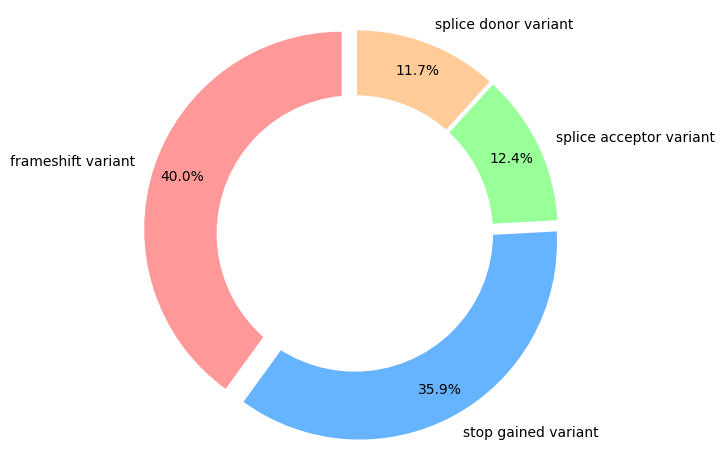

In [441]:
##gráfico de pizza para visualizar as quantidades (em porcentagem) das variantes por consequência
labels = column_name
sizes = l
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

#explsion
explode = (0.07,0.05,0.03,0.03)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()
plt.show()

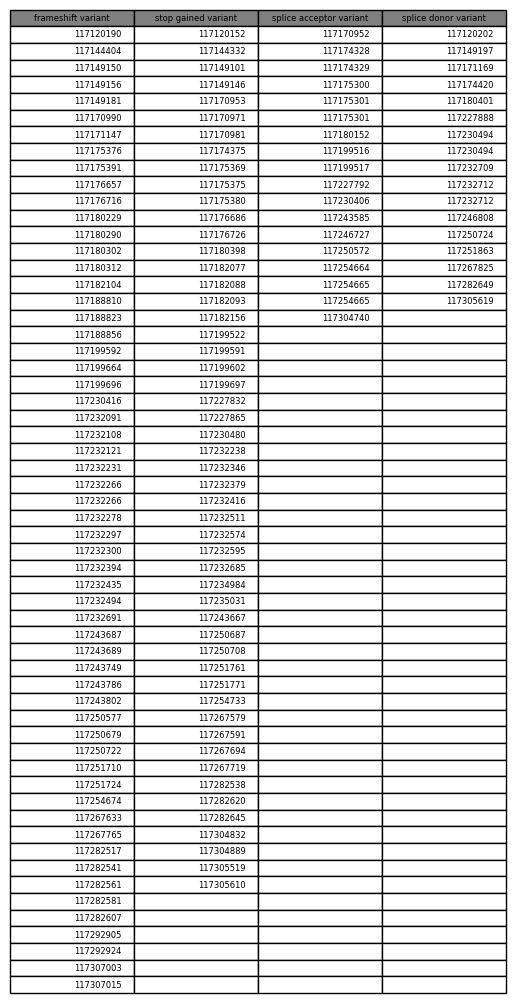

In [442]:
##tabela de variantes por consequência
fig, ax =plt.subplots(1,1)
ax.table(cellText=tabela.values,
        colLabels=tabela.columns,
        colColours =["gray"] * 4,
        loc="center")
ax.axis("off")
plt.savefig('variantes_por_conseq.pdf')
plt.show()